In [1]:
import pandas as pd

# cargo el insumo
dataset_path = r"C:\Users\DELL\synthetic_customer_data.csv"
data = pd.read_csv(dataset_path)


print(data.head())
print(data.info())

  customer_id  age  gender  annual_income   total_spent  num_purchases  \
0   CUST_0001   56    Male          65648  49624.926758             17   
1   CUST_0002   69    Male         123537  46357.348299            196   
2   CUST_0003   46    Male         145991  27043.860801            175   
3   CUST_0004   32  Female          29516  42117.461389             25   
4   CUST_0005   60    Male         132863  26095.803066             94   

   avg_purchase_value  online_activity_score  loyalty_program  \
0          467.729972              52.525842                0   
1          874.799829              11.120875                0   
2          207.419293              86.816930                0   
3          131.749484              29.736153                0   
4          289.081236              16.253799                1   

   days_since_last_purchase  num_site_visits customer_segment  
0                       235               61     medium_value  
1                       182         

In [2]:
# estadisticas descriptivas
print(data.describe())


              age  annual_income   total_spent  num_purchases  \
count  1000.00000    1000.000000   1000.000000    1000.000000   
mean     43.81900   87130.677000  25083.705801     100.044000   
std      14.99103   38333.193443  14427.156274      56.211812   
min      18.00000   20207.000000    106.721181       1.000000   
25%      31.00000   52723.250000  13058.712181      54.000000   
50%      44.00000   88482.000000  25332.129881     100.000000   
75%      56.00000  121396.750000  37736.172303     149.000000   
max      69.00000  149839.000000  49917.540819     199.000000   

       avg_purchase_value  online_activity_score  loyalty_program  \
count         1000.000000            1000.000000      1000.000000   
mean           502.587993              48.950592         0.289000   
std            286.999641              28.469967         0.453525   
min              5.185596               0.092942         0.000000   
25%            256.496539              24.407169         0.000000   


In [3]:
# variables categóricas
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Columnas categóricas: {categorical_cols}")

# variables numéricas
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
print(f"Columnas numéricas: {numerical_cols}")


Columnas categóricas: Index(['customer_id', 'gender', 'customer_segment'], dtype='object')
Columnas numéricas: Index(['age', 'annual_income', 'total_spent', 'num_purchases',
       'avg_purchase_value', 'online_activity_score', 'loyalty_program',
       'days_since_last_purchase', 'num_site_visits'],
      dtype='object')


C:\Users\DELL\AppData\Local\Temp\ipykernel_2212\2393876467.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")


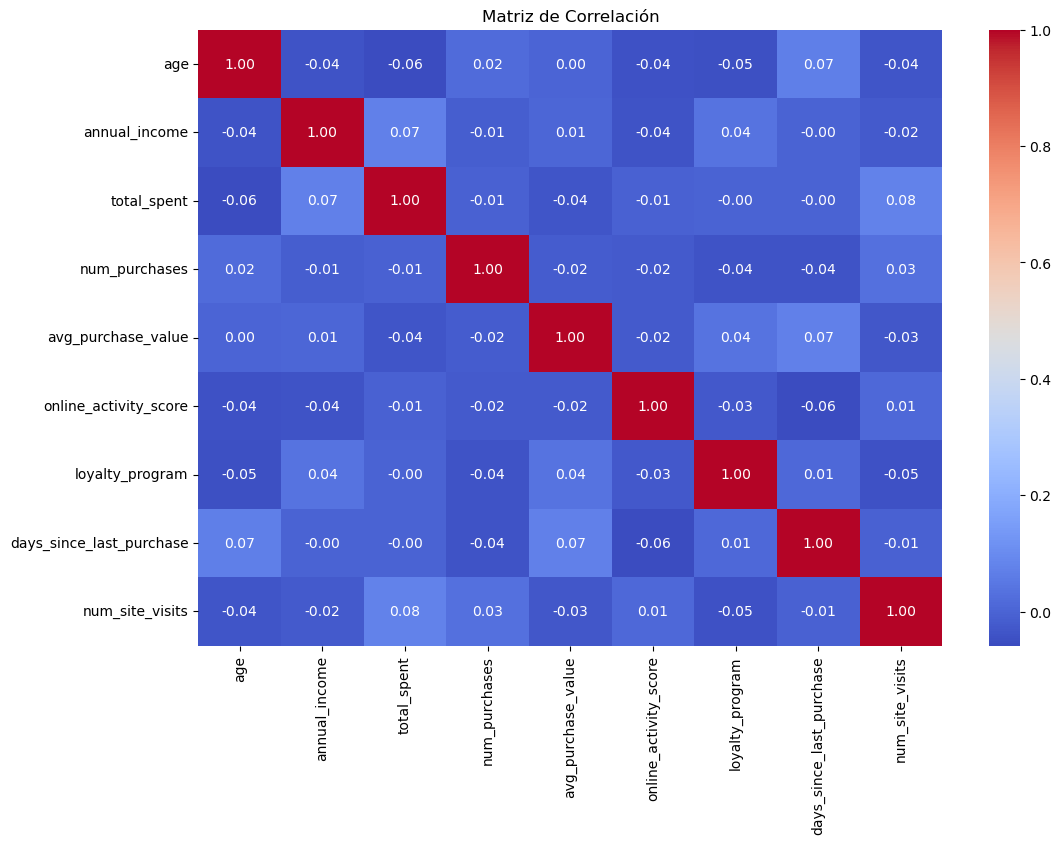

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()


In [5]:
# Clasifico a los clientes en categorias
high_spent_threshold = data['total_spent'].quantile(0.75)  # 75% superior
low_spent_threshold = data['total_spent'].quantile(0.25)   # 25% inferior
high_purchases_threshold = data['num_purchases'].quantile(0.75)  # 75% superior
low_purchases_threshold = data['num_purchases'].quantile(0.25)   # 25% inferior

# fucnion
def classify_customer(row):
    if row['total_spent'] > high_spent_threshold and row['num_purchases'] > high_purchases_threshold:
        return 'high_value'
    elif row['num_purchases'] > low_purchases_threshold and row['total_spent'] > low_spent_threshold:
        return 'frequent'
    else:
        return 'occasional'

# Aplicar la función para crear la nueva columna
data['customer_segment'] = data.apply(classify_customer, axis=1)

# Verificar la distribución de las categorías
print(data['customer_segment'].value_counts())


frequent      486
occasional    446
high_value     68
Name: customer_segment, dtype: int64


In [6]:
from sklearn.preprocessing import StandardScaler

# columnas numéricas a estandarizar
numerical_columns = ['age', 'annual_income', 'total_spent', 'num_purchases',
                     'avg_purchase_value', 'online_activity_score', 
                     'days_since_last_purchase', 'num_site_visits']

# copia del dataset para mantener el original intacto
data_scaled = data.copy()

# escalador estándar (media = 0, desviación estándar = 1)
scaler = StandardScaler()

# escalador solo a las columnas numéricas
data_scaled[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# resultados de la estandarización
print(data_scaled[numerical_columns].describe())


                age  annual_income   total_spent  num_purchases  \
count  1.000000e+03   1.000000e+03  1.000000e+03   1.000000e+03   
mean  -1.634248e-16   1.048051e-16 -5.062617e-17   4.973799e-17   
std    1.000500e+00   1.000500e+00  1.000500e+00   1.000500e+00   
min   -1.723158e+00  -1.746715e+00 -1.732114e+00  -1.762860e+00   
25%   -8.555393e-01  -8.980375e-01 -8.339142e-01  -8.195260e-01   
50%    1.207993e-02   3.526967e-02  1.722782e-02  -7.831453e-04   
75%    8.129592e-01   8.943481e-01  8.774285e-01   8.713559e-01   
max    1.680578e+00   1.636694e+00  1.722187e+00   1.761294e+00   

       avg_purchase_value  online_activity_score  days_since_last_purchase  \
count        1.000000e+03           1.000000e+03              1.000000e+03   
mean         2.309264e-16           4.263256e-17             -9.237056e-17   
std          1.000500e+00           1.000500e+00              1.000500e+00   
min         -1.733979e+00          -1.716971e+00             -1.761541e+00   
25%   

In [7]:
from sklearn.model_selection import train_test_split

# características (X) y la variable objetivo (y)
X = data_scaled.drop(columns=['customer_id', 'customer_segment'])  # Excluir identificadores y target
y = data_scaled['customer_segment']  # Variable objetivo

# conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# tamaños
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de validación: {X_val.shape}")

# distribución de las clases en cada conjunto
print("Distribución en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nDistribución en el conjunto de validación:")
print(y_val.value_counts(normalize=True))


Tamaño del conjunto de entrenamiento: (800, 10)
Tamaño del conjunto de validación: (200, 10)
Distribución en el conjunto de entrenamiento:
frequent      0.48625
occasional    0.44625
high_value    0.06750
Name: customer_segment, dtype: float64

Distribución en el conjunto de validación:
frequent      0.485
occasional    0.445
high_value    0.070
Name: customer_segment, dtype: float64


In [26]:
print(X_train.columns)
print(X_train.dtypes)


Index(['age', 'gender', 'annual_income', 'total_spent', 'num_purchases',
       'avg_purchase_value', 'online_activity_score', 'loyalty_program',
       'days_since_last_purchase', 'num_site_visits'],
      dtype='object')
age                         float64
gender                       object
annual_income               float64
total_spent                 float64
num_purchases               float64
avg_purchase_value          float64
online_activity_score       float64
loyalty_program               int64
days_since_last_purchase    float64
num_site_visits             float64
dtype: object


In [27]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# verifico columnas y codificar 'gender'
print("Columnas antes de la codificación:")
print(X_train.columns)
print("Tipos de datos:")
print(X_train.dtypes)

# codifico 'gender' con One-Hot Encoding
if 'gender' in X_train.columns:
    X_train = pd.get_dummies(X_train, columns=['gender'], drop_first=True)
    print("\nColumna 'gender' codificada.")
else:
    print("\nLa columna 'gender' no está presente. Continuamos.")



Columnas antes de la codificación:
Index(['age', 'gender', 'annual_income', 'total_spent', 'num_purchases',
       'avg_purchase_value', 'online_activity_score', 'loyalty_program',
       'days_since_last_purchase', 'num_site_visits'],
      dtype='object')
Tipos de datos:
age                         float64
gender                       object
annual_income               float64
total_spent                 float64
num_purchases               float64
avg_purchase_value          float64
online_activity_score       float64
loyalty_program               int64
days_since_last_purchase    float64
num_site_visits             float64
dtype: object

Columna 'gender' codificada.


In [28]:
# Normalizar/Estandarizar las columnas numéricas
numerical_columns = ['age', 'annual_income', 'total_spent', 'num_purchases',
                     'avg_purchase_value', 'online_activity_score',
                     'days_since_last_purchase', 'num_site_visits']

# Crear un escalador estándar y aplicarlo
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Verificar la estandarización
print("\nDatos normalizados:")
print(X_train[numerical_columns].describe())




Datos normalizados:
                age  annual_income   total_spent  num_purchases  \
count  8.000000e+02   8.000000e+02  8.000000e+02   8.000000e+02   
mean  -2.220446e-17  -1.554312e-17 -2.664535e-17  -1.776357e-17   
std    1.000626e+00   1.000626e+00  1.000626e+00   1.000626e+00   
min   -1.682641e+00  -1.720263e+00 -1.717283e+00  -1.746651e+00   
25%   -8.890206e-01  -8.952416e-01 -8.220686e-01  -8.075557e-01   
50%    3.687030e-02   5.242422e-02  1.931198e-02   7.508335e-03   
75%    8.304911e-01   8.818656e-01  8.645683e-01   8.580100e-01   
max    1.690247e+00   1.635295e+00  1.722111e+00   1.761668e+00   

       avg_purchase_value  online_activity_score  days_since_last_purchase  \
count        8.000000e+02           8.000000e+02              8.000000e+02   
mean         3.552714e-17           2.442491e-17             -3.552714e-17   
std          1.000626e+00           1.000626e+00              1.000626e+00   
min         -1.694711e+00          -1.752986e+00             -1

In [29]:
# Dividir los datos en conjuntos de entrenamiento y validación
X = data_scaled.drop(columns=['customer_id', 'customer_segment'])  # Excluir identificadores y target
y = data_scaled['customer_segment']  # Variable objetivo

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"\nTamaños del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaños del conjunto de validación: {X_val.shape}")




Tamaños del conjunto de entrenamiento: (800, 10)
Tamaños del conjunto de validación: (200, 10)


In [30]:
# Entrenamiento y Evaluación del Modelo
# modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_val)

# Evaluar el modelo
print("\nMétricas de Evaluación:")
print(classification_report(y_val, y_pred))
print(f"Precisión (accuracy): {accuracy_score(y_val, y_pred):.2f}")


ValueError: could not convert string to float: 'Male'

In [31]:
# Codificar 'gender' con One-Hot Encoding en ambos conjuntos
if 'gender' in X.columns:
    X = pd.get_dummies(X, columns=['gender'], drop_first=True)
    print("\nColumna 'gender' codificada correctamente.")
else:
    print("\nLa columna 'gender' no está presente en los datos. Verifica el dataset.")



Columna 'gender' codificada correctamente.


In [32]:
# Dividir en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Verificar las columnas después de la división
print("\nColumnas en X_train y X_val:")
print(X_train.columns)



Columnas en X_train y X_val:
Index(['age', 'annual_income', 'total_spent', 'num_purchases',
       'avg_purchase_value', 'online_activity_score', 'loyalty_program',
       'days_since_last_purchase', 'num_site_visits', 'gender_Male'],
      dtype='object')


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = rf_model.predict(X_val)

# Evaluar el modelo
print("\nMétricas de Evaluación:")
print(classification_report(y_val, y_pred))
print(f"Precisión (accuracy): {accuracy_score(y_val, y_pred):.2f}")



Métricas de Evaluación:
              precision    recall  f1-score   support

    frequent       1.00      0.99      0.99        97
  high_value       1.00      1.00      1.00        14
  occasional       0.99      1.00      0.99        89

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200

Precisión (accuracy): 0.99


In [34]:
import joblib

# Guardar el modelo entrenado
joblib.dump(rf_model, 'random_forest_model.joblib')

print("El modelo se ha guardado como 'random_forest_model.joblib'")


El modelo se ha guardado como 'random_forest_model.joblib'


In [35]:
# Cargar el modelo desde el archivo
loaded_model = joblib.load('random_forest_model.joblib')

# Probar el modelo cargado con el conjunto de validación
y_pred_loaded = loaded_model.predict(X_val)

# Verificar resultados
from sklearn.metrics import classification_report, accuracy_score
print("Resultados del modelo cargado:")
print(classification_report(y_val, y_pred_loaded))
print(f"Precisión (accuracy): {accuracy_score(y_val, y_pred_loaded):.2f}")


Resultados del modelo cargado:
              precision    recall  f1-score   support

    frequent       1.00      0.99      0.99        97
  high_value       1.00      1.00      1.00        14
  occasional       0.99      1.00      0.99        89

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200

Precisión (accuracy): 0.99
